In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker="CL=F"

import pandas as pd 

data=yf.download(ticker, start='2023-05-20', end='2023-07-20')

data.head()

x=data['Close']

type(x)

y=x.values
type(y)


[*********************100%***********************]  1 of 1 completed


numpy.ndarray

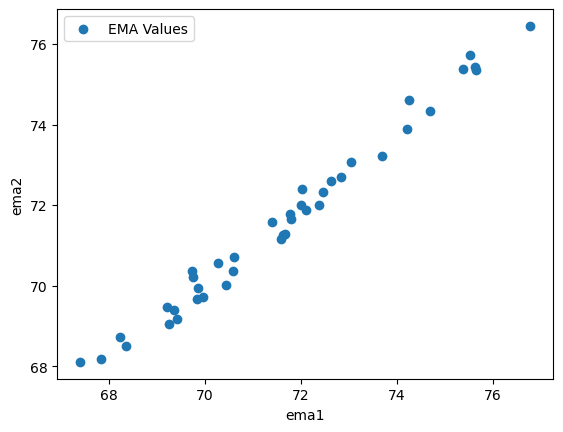

In [59]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': y })
 
# finding EMA
# use any constant value that results in
# good smoothened curve
ema1 = stockValues.ewm(com=0.09).mean()
ema2 = stockValues.ewm(com=0.40).mean() 
# Comparison plot b/w stock values & EMA
#plt.plot(stockValues, label="Stock Values")
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

In [60]:
new=pd.DataFrame(ema1)
new['ema2']=ema2
new.rename(columns={'Stock_Values':'ema1'} )
new['const']=1
X=['const','ema2']
Y=[new['Stock_Values']]


                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2405.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           5.73e-36
Time:                        12:59:12   Log-Likelihood:                -5.3653
No. Observations:                  40   AIC:                             14.73
Df Residuals:                      38   BIC:                             18.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3560      1.372      3.175   

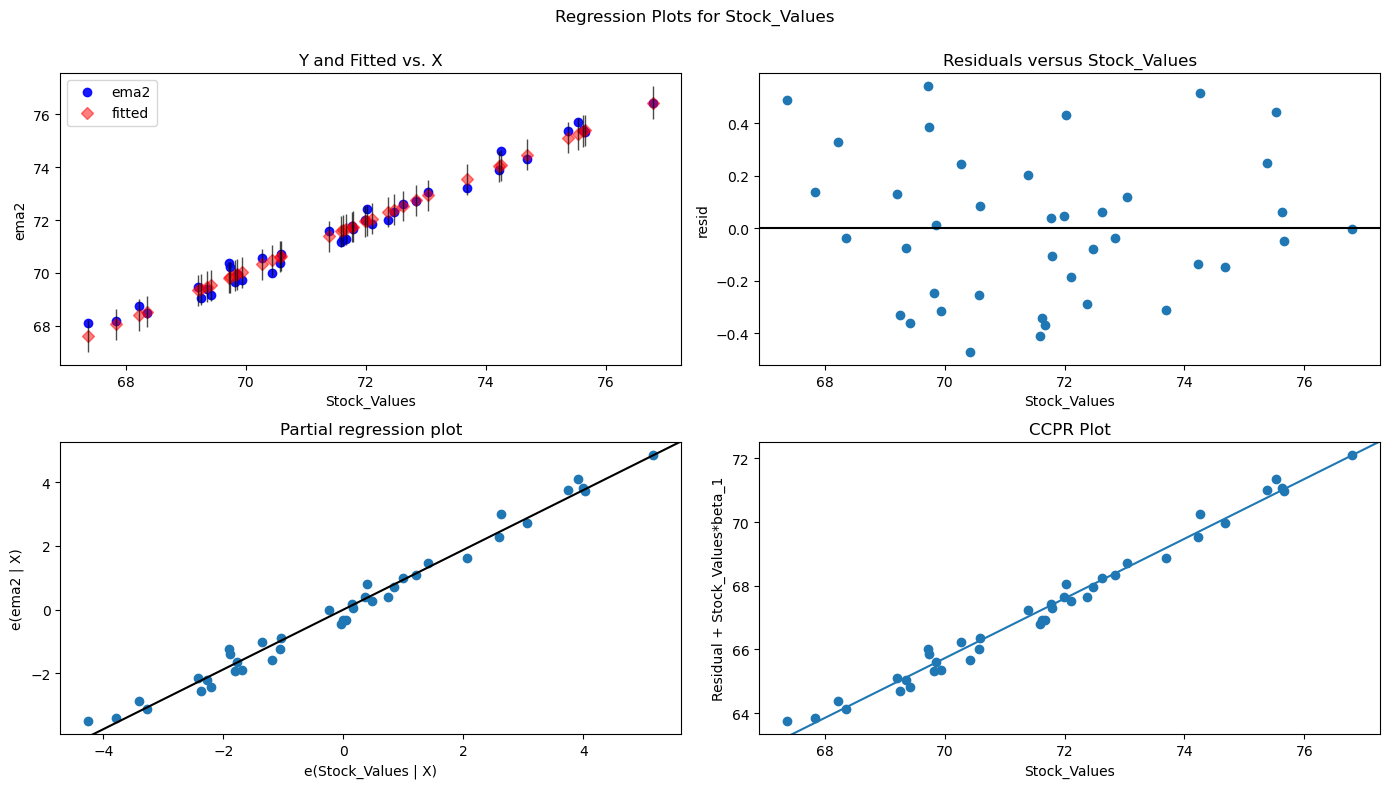

In [61]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# reading the csv file
# data = pd.read_csv('headbrain3.csv')
  
# fit simple linear regression model
linear_model = ols("ema2 ~ Stock_Values", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    1,
                                    fig=fig)

In [82]:
temp=linear_model.params[1]
temp

0.9388551844167488

In [62]:
ans=linear_model.resid

In [63]:
ans

0     0.045861
1    -0.036452
2    -0.133987
3     0.432900
4     0.063854
5     0.541384
6     0.327862
7    -0.313746
8    -0.410105
9    -0.183887
10    0.038707
11   -0.077540
12    0.204561
13    0.243866
14    0.490613
15   -0.328363
16   -0.036321
17   -0.470200
18   -0.367727
19    0.085526
20   -0.287987
21    0.387700
22    0.131727
23   -0.074855
24    0.139971
25   -0.362039
26   -0.248064
27   -0.252809
28    0.013699
29   -0.341188
30   -0.105409
31   -0.311252
32    0.120772
33   -0.148629
34   -0.049024
35   -0.001473
36    0.443166
37    0.517486
38    0.061449
39    0.249954
dtype: float64

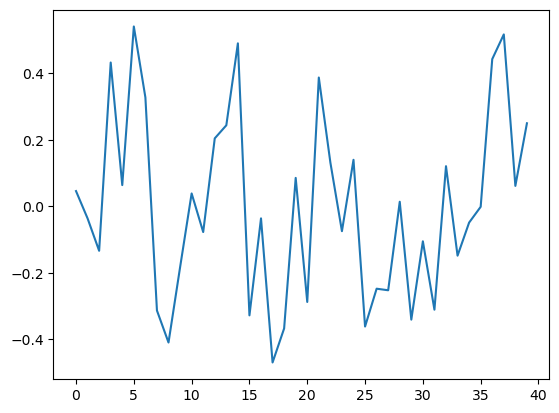

In [64]:
plt.plot(ans)

In [65]:
from statsmodels.tsa.stattools import adfuller

In [79]:
from statsmodels.stats.stattools import jarque_bera
  
# Using statsmodels.jarque_bera() method
jb_res = jarque_bera(ans)
  
print(jb_res[2])


0.29267096821313426


In [66]:
result = adfuller(ans)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.875528
p-value: 0.002223
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [83]:
import math 
spread= (ema1)-temp*(ema2)

In [84]:
import scipy.stats as stats

res=stats.zscore(spread)

In [85]:
res

,Stock_Values,const,ema2
0,-0.000391,NaN,NaN
1,0.467541,NaN,NaN
2,1.137323,NaN,NaN
3,-0.943962,NaN,NaN
4,0.150553,NaN,NaN
5,-1.930320,NaN,NaN
6,-1.869573,NaN,NaN
7,0.249834,NaN,NaN
8,1.000714,NaN,NaN
9,0.602052,NaN,NaN


In [86]:
res["Stock_Values"]

0    -0.000391
1     0.467541
2     1.137323
3    -0.943962
4     0.150553
5    -1.930320
6    -1.869573
7     0.249834
8     1.000714
9     0.602052
10   -0.051275
11    0.452836
12   -0.579846
13   -1.024804
14   -2.534341
15    0.069782
16   -0.931491
17    0.787820
18    0.920117
19   -0.532487
20    0.941960
21   -1.543123
22   -1.079029
23   -0.523051
24   -1.526769
25    0.204656
26    0.049838
27    0.294966
28   -0.586411
29    0.842613
30    0.309323
31    1.410187
32    0.144328
33    1.318639
34    1.377916
35    1.611659
36    0.123181
37   -0.455579
38    1.094532
39    0.550081
Name: Stock_Values, dtype: float64

In [87]:
ema1


,Stock_Values,ema2,const
0,71.989998,71.989998,1
1,72.839834,72.705558,1
2,74.216905,73.900893,1
3,72.026984,72.411762,1
4,72.616908,72.596568,1
5,69.720660,70.354942,1
6,68.224638,68.736872,1
7,69.945152,69.710577,1
8,71.591800,71.160182,1
9,72.103911,71.867198,1


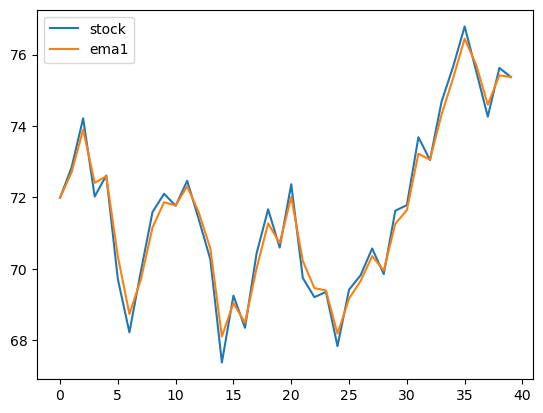

In [88]:
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["stock","ema1","ema2"])

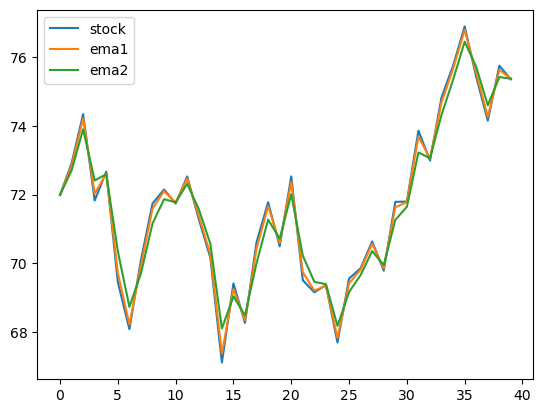

In [89]:
plt.plot(range(0,40),data['Close'])
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["stock","ema1","ema2"])

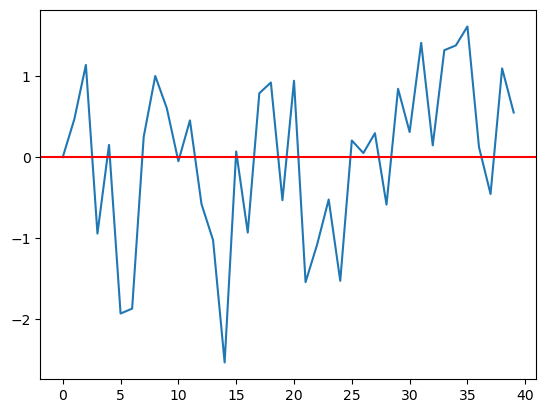

In [90]:
plt.plot(res)
plt.axhline(y=0, c='r')